<a href="https://colab.research.google.com/github/jmh8fr/ds1002-jmh8fr/blob/main/labs/lab1/lab1-ftx-stock-pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID
Jacob Higgins             jmh8fr

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [9]:
import pandas as pd

csv_ur1 = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"

df = pd.read_csv(csv_ur1, sep=';')

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [10]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [11]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

df.drop_duplicates()

columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)

df.to_csv("cleaned_ftx_data.csv", index=False)
df

Null values in each column:
 timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64


,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
...,...,...,...,...,...,...
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z


Now display the first 10 rows of the cleaned dataset.

In [12]:
print(df.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  
0  2022-12-31T23:59:59.999Z  
1  2022-12-30T23:59:59.999Z  
2  2022-12-29T23:59:59.999Z  
3  2022-12-28T23:59:59.999Z  
4  2022-12-27T23:59:59.999Z  
5  2022-12-26T23:59:59.999Z  
6  2022-12-25T23:59:59.999Z  
7  2022-12-24T23:59:59.999Z  
8  2022-12-23T23:59:59.999Z  
9  2022-12-22T23:59:59.999Z  


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [13]:
df['close_change'] = df['close'] - df['close'].shift(1)

print(df.head())

       open      high       low     close      volume  \
0  0.838968  0.853502  0.835226  0.842688  3001502.06   
1  0.860193  0.864752  0.826643  0.839048  3608615.07   
2  0.885723  0.887118  0.843029  0.860231  3766979.57   
3  0.921162  0.925702  0.869842  0.886091  4192949.85   
4  0.931138  0.955402  0.916414  0.923668  4574953.05   

                  timestamp  close_change  
0  2022-12-31T23:59:59.999Z           NaN  
1  2022-12-30T23:59:59.999Z     -0.003640  
2  2022-12-29T23:59:59.999Z      0.021183  
3  2022-12-28T23:59:59.999Z      0.025860  
4  2022-12-27T23:59:59.999Z      0.037577  


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [17]:
df = df.sort_values(by='timestamp')

df['close_change'] = df['close'] - df['close'].shift(1)
top_growth_days = df[df['close_change'] > 0].sort_values(by='close_change', ascending=False)

top_10_growth_days = top_growth_days.head(10)

print(top_10_growth_days[['timestamp', 'close_change']])

                    timestamp  close_change
492  2021-09-01T23:59:59.999Z     16.677156
487  2021-09-06T23:59:59.999Z      9.800320
692  2021-02-19T23:59:59.999Z      8.335900
592  2021-05-24T23:59:59.999Z      6.333923
674  2021-03-09T23:59:59.999Z      5.529699
515  2021-08-09T23:59:59.999Z      5.325192
485  2021-09-08T23:59:59.999Z      5.239728
625  2021-04-26T23:59:59.999Z      4.504385
611  2021-05-05T23:59:59.999Z      4.488174
311  2022-02-28T23:59:59.999Z      4.401841


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [18]:
df['close_change'] = df['close'] - df['close'].shift(1)
df['rate_of_change'] = (df['close_change'] / df['close'].shift(1)) * 100

print(df.head())

         open      high       low     close       volume  \
740  6.201133  7.007523  6.171834  6.923968  31046652.87   
739  6.201133  7.007523  6.171834  6.923968  31046652.87   
738  6.948680  7.632146  6.358218  7.514079  40526109.15   
737  7.528216  8.714947  7.081120  8.664688  49479278.39   
736  8.671285  9.390797  8.425946  9.390797  31404627.93   

                    timestamp  close_change  rate_of_change  
740  2021-01-03T23:59:59.999Z           NaN             NaN  
739  2021-01-03T23:59:59.999Z      0.000000        0.000000  
738  2021-01-04T23:59:59.999Z      0.590111        8.522727  
737  2021-01-05T23:59:59.999Z      1.150608       15.312701  
736  2021-01-06T23:59:59.999Z      0.726110        8.380101  


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [19]:
top_rate_changes = df.reindex(df['rate_of_change'].abs().sort_values(ascending=False).index)
top_5_rate_changes = top_rate_changes.head(5)

print(top_5_rate_changes[['timestamp', 'rate_of_change']])

                    timestamp  rate_of_change
55   2022-11-08T23:59:59.999Z      -75.075175
54   2022-11-09T23:59:59.999Z      -58.313683
53   2022-11-10T23:59:59.999Z       52.868637
492  2021-09-01T23:59:59.999Z       34.382542
692  2021-02-19T23:59:59.999Z       31.766452


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

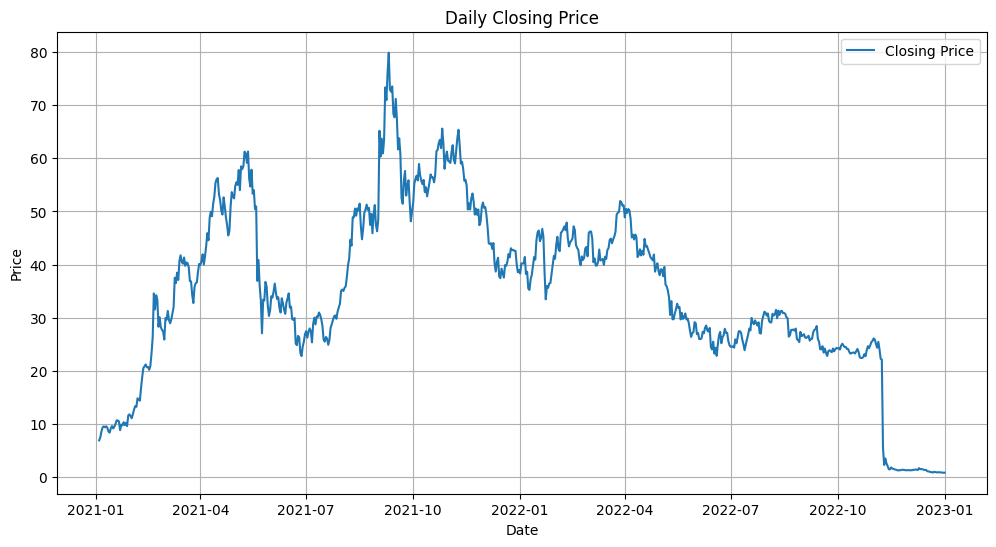

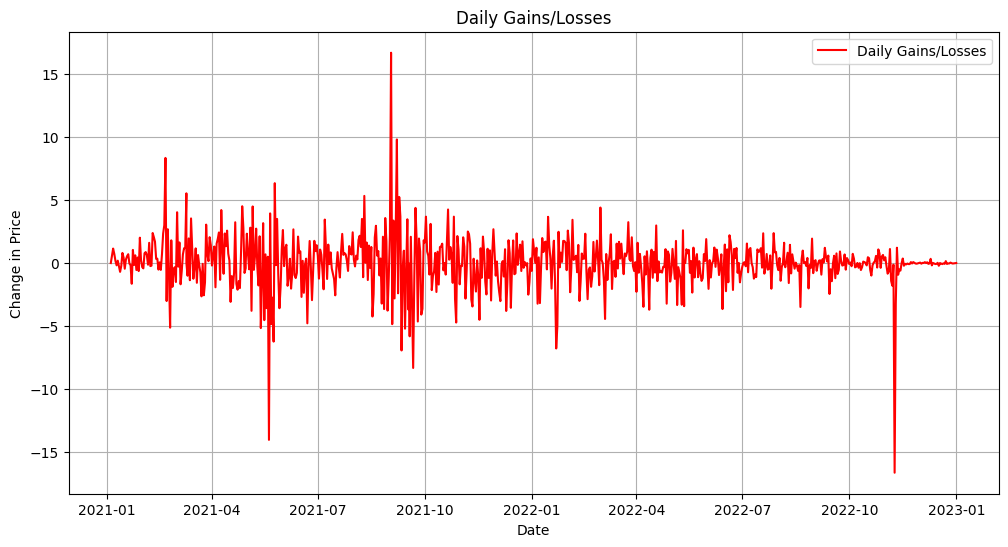

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Price')
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['close_change'], label='Daily Gains/Losses', color='red')
plt.title('Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Change in Price')
plt.legend()
plt.grid(True)
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

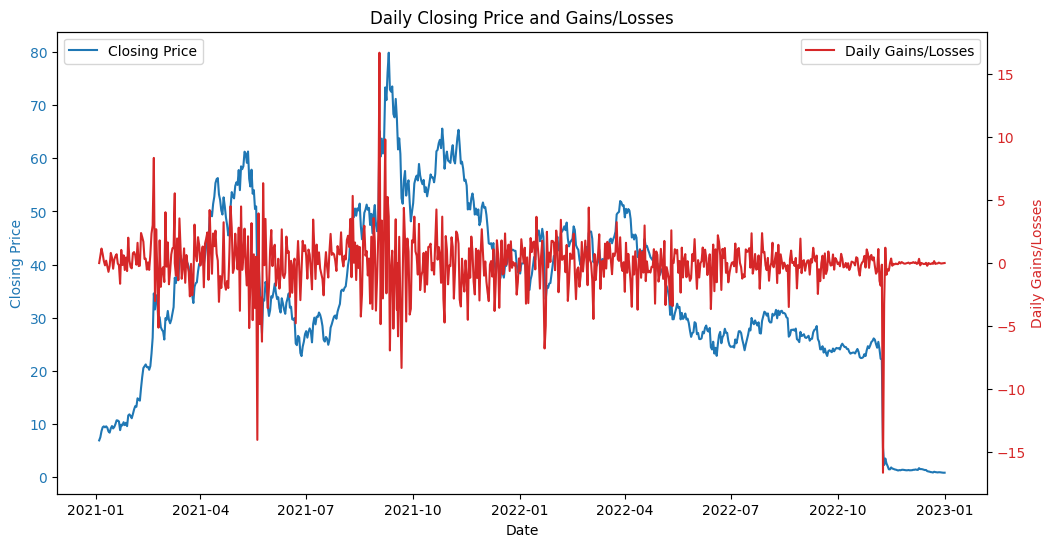

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(df['close'], label='Closing Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily Gains/Losses', color=color)
ax2.plot(df['close_change'], label='Daily Gains/Losses', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Closing Price and Gains/Losses')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()